# Linear Regression
- Tries to establish how X causes Y
- Linear Regression is an equation (Y = alpha + beta * X)
- If we see X, we expect Y
- Example: House size and price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools

In [2]:
data = pd.read_csv('results/focus.csv', index_col=0)
df = data.head(2)

In [3]:
top_companies = []
for i, row in df.iterrows():
    print(i)
    top_companies.append(i)

ADMCM.HE
ICP1V.HE


In [4]:
def price_history(company, timeline):
    max_try = 5
    attemp = 1
    while attemp < max_try:
        try:
            yf = YahooFinancials(company)
            data = yf.get_historical_price_data('2018-04-12', '2021-04-12', timeline)
            data_1 = data[company]['prices']

        except IncompleteRead:
            attemp += 1
            if attemp == max_try:
                print(f'Failed {N}')
        except ValueError as e:
            print(f'{e}: {N}')
            attemp = max_try
        else:
            break
            
    df = pd.DataFrame.from_dict(data_1)
    if timeline == 'weekly':
        df.to_csv(f"results/price_history_weekly_{company.split('.')[0]}.csv")
    elif timeline == 'monthly':
        df.to_csv(f"results/price_history_monthly_{company.split('.')[0]}.csv")
    else:
        df.to_csv(f"results/price_history_{company.split('.')[0]}.csv")

In [5]:
top_prices = []

for i in top_companies:
    price_history(i, 'daily')    
    top_prices.append(f"results/price_history_{i.split('.')[0]}.csv")
    print(f"results/price_history_{i.split('.')[0]}.csv")

results/price_history_ADMCM.csv
results/price_history_ICP1V.csv


In [6]:
df_data = []
for i in top_prices:
    data = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del data['Unnamed: 0']
    df_data.append(data)

In [7]:
companies = []
for n in range(len(df_data)):
    company = df_data[n]['adjclose']
    companies.append(company)
df = pd.concat(companies, axis=1)
df.columns = top_companies
df

,ADMCM.HE,ICP1V.HE
formatted_date,,
2018-04-12,13.777140,6.000000
2018-04-13,13.491439,5.920000
2018-04-16,13.789043,5.980000
2018-04-17,13.902134,6.000000
2018-04-18,13.967607,6.060000
...,...,...
2021-04-01,97.000000,24.400000
2021-04-06,95.400002,24.750000
2021-04-07,98.000000,25.200001


In [8]:
data = np.log(df/df.shift())
data

,ADMCM.HE,ICP1V.HE
formatted_date,,
2018-04-12,NaN,NaN
2018-04-13,-0.020955,-0.013423
2018-04-16,0.021819,0.010084
2018-04-17,0.008168,0.003339
2018-04-18,0.004699,0.009950
...,...,...
2021-04-01,0.012448,0.004107
2021-04-06,-0.016632,0.014242
2021-04-07,0.026889,0.018019


In [9]:
def lin_regr(ticker_a, ticker_b):
    X = data[ticker_a].iloc[1:].values.reshape(-1, 1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1, 1)
    
    lin_regressor = LinearRegression()
    lin_regressor.fit(X, Y)
    Y_pred = lin_regressor.predict(X)
    
    alpha = str(round(lin_regressor.intercept_[0], 5))
    beta = str(round(lin_regressor.coef_[0][0], 5))
    
    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + alpha + ", Beta: " + beta)
    ax.scatter(X, Y, alpha=0.3)
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


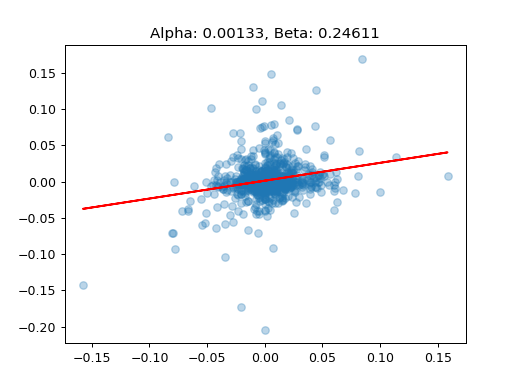

In [10]:
lin_regr(top_companies[0], top_companies[1])

In [11]:
def calc_beta(ticker_a, ticker_b):
    X = data[ticker_a].iloc[1:].values.reshape(-1, 1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1, 1)
    
    lin_regressor = LinearRegression()
    lin_regressor.fit(X, Y)
    Y_pred = lin_regressor.predict(X)
    
    return lin_regressor.coef_[0][0]

In [12]:
calc_beta(top_companies[0], top_companies[1])

0.24611062295039346

In [13]:
df = pd.DataFrame(None, index=top_companies, columns=top_companies)
for t1, t2 in itertools.combinations(top_companies, 2):
    df.loc[t1][t2] = calc_beta(t1, t2)
    df.loc[t2][t1] = calc_beta(t2, t1)

for t in top_companies:
    df.loc[t][t] = calc_beta(t, t)

In [14]:
df

,ADMCM.HE,ICP1V.HE
ADMCM.HE,1,0.246111
ICP1V.HE,0.204785,1
